<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Data Discovery
</div>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

### Read raw data that we have collected

In [16]:
processed_df=pd.read_csv("../data/processed/processed_data.csv")
processed_df

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,237,Viet Nam,5312,Area harvested,711,"Anise, badian, coriander, cumin, caraway, fenn...",1961,ha,1000.00,E,Estimated value
1,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,711,"Anise, badian, coriander, cumin, caraway, fenn...",1961,100 g/ha,7000.00,E,Estimated value
2,QCL,Crops and livestock products,237,Viet Nam,5510,Production,711,"Anise, badian, coriander, cumin, caraway, fenn...",1961,t,700.00,E,Estimated value
3,QCL,Crops and livestock products,237,Viet Nam,5312,Area harvested,711,"Anise, badian, coriander, cumin, caraway, fenn...",1962,ha,1000.00,E,Estimated value
4,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,711,"Anise, badian, coriander, cumin, caraway, fenn...",1962,100 g/ha,7000.00,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15065,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,1735,Vegetables Primary,2020,100 g/ha,170584.00,E,Estimated value
15066,QCL,Crops and livestock products,237,Viet Nam,5510,Production,1735,Vegetables Primary,2020,t,17006433.11,E,Estimated value
15067,QCL,Crops and livestock products,237,Viet Nam,5312,Area harvested,1735,Vegetables Primary,2021,ha,1002974.00,E,Estimated value
15068,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,1735,Vegetables Primary,2021,100 g/ha,171731.00,E,Estimated value


With the dataframe we have, we shall make 2 questions regarding to discovery of the data:

### 1. What is the production growth of each item in Vietnam Agriculture, from 2000 to 2021?
### 2. What is the correlation between all of the elements in each items?

Solving question 1
### Extracting only the production values from the dataframe

In [17]:
processed_df_production=processed_df[processed_df['Element']== 'Production'][processed_df['Year'].between(2000, 2021)]
processed_df_production.drop(columns=['Element'])

C:\Users\admind\AppData\Local\Temp\ipykernel_25800\4024248327.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_df_production=processed_df[processed_df['Element']== 'Production'][processed_df['Year'].between(2000, 2021)]


,Domain Code,Domain,Area Code,Area,Element Code,Item Code,Item,Year,Unit,Value,Flag,Flag Description
119,QCL,Crops and livestock products,237,Viet Nam,5510,711,"Anise, badian, coriander, cumin, caraway, fenn...",2000,t,3200.00,E,Estimated value
122,QCL,Crops and livestock products,237,Viet Nam,5510,711,"Anise, badian, coriander, cumin, caraway, fenn...",2001,t,3176.35,I,Imputed value
125,QCL,Crops and livestock products,237,Viet Nam,5510,711,"Anise, badian, coriander, cumin, caraway, fenn...",2002,t,3244.44,I,Imputed value
128,QCL,Crops and livestock products,237,Viet Nam,5510,711,"Anise, badian, coriander, cumin, caraway, fenn...",2003,t,3300.00,E,Estimated value
131,QCL,Crops and livestock products,237,Viet Nam,5510,711,"Anise, badian, coriander, cumin, caraway, fenn...",2004,t,3396.46,I,Imputed value
...,...,...,...,...,...,...,...,...,...,...,...,...
15057,QCL,Crops and livestock products,237,Viet Nam,5510,1735,Vegetables Primary,2017,t,15723915.48,E,Estimated value
15060,QCL,Crops and livestock products,237,Viet Nam,5510,1735,Vegetables Primary,2018,t,16266791.68,E,Estimated value
15063,QCL,Crops and livestock products,237,Viet Nam,5510,1735,Vegetables Primary,2019,t,16674164.74,E,Estimated value
15066,QCL,Crops and livestock products,237,Viet Nam,5510,1735,Vegetables Primary,2020,t,17006433.11,E,Estimated value


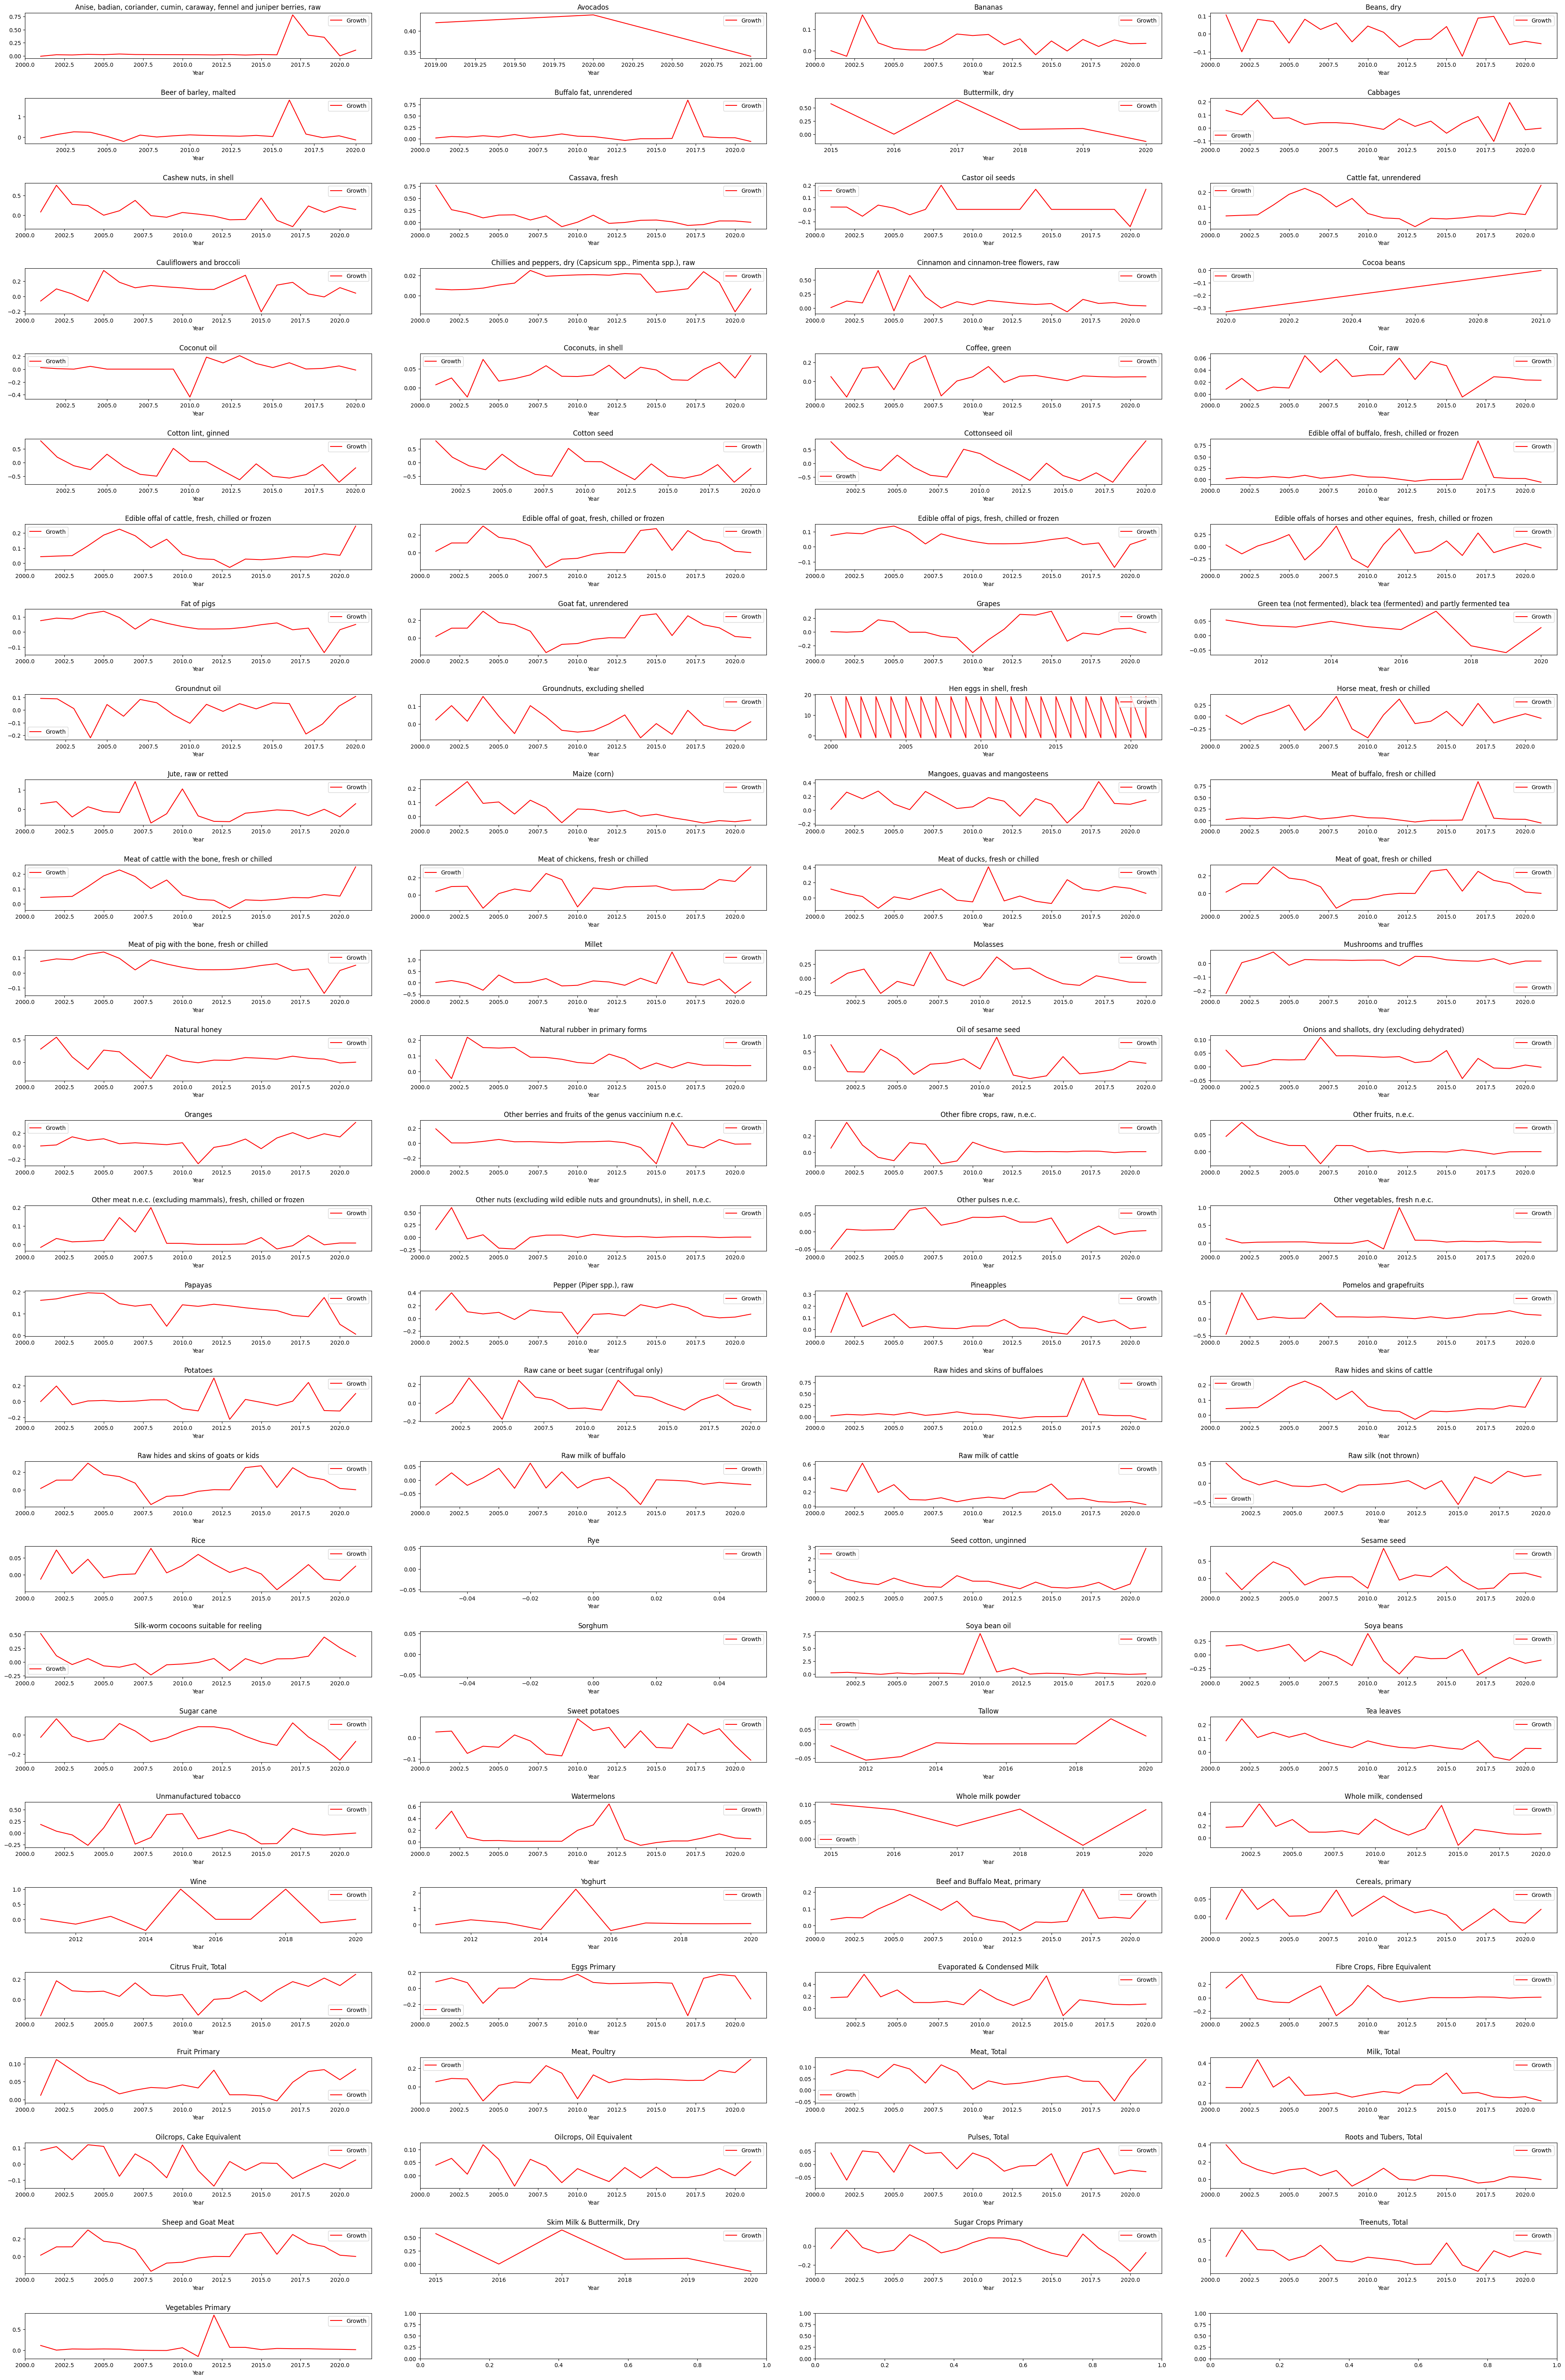

In [21]:
nrow=28
ncol=4

i=0
j=0
fig, axes=plt.subplots(nrow, ncol, figsize=(40, 60))
fig.tight_layout(pad=5.0)
for item in processed_df_production['Item'].unique():
    newPandas=pd.DataFrame()
    temp=processed_df_production[processed_df_production['Item']==item]
    newPandas['Growth']=temp['Value'].pct_change()
    newPandas['Year']=temp['Year']
    newPandas=newPandas.astype({'Year': 'int'})
    newPandas.plot(x='Year', y='Growth', color='red', title=item, ax=axes[i][j])
    j=j+1
    if j==ncol:
        j=0
        i=i+1

Question 2

### The same way, extract the dataframe within the year of 2000 and 2021

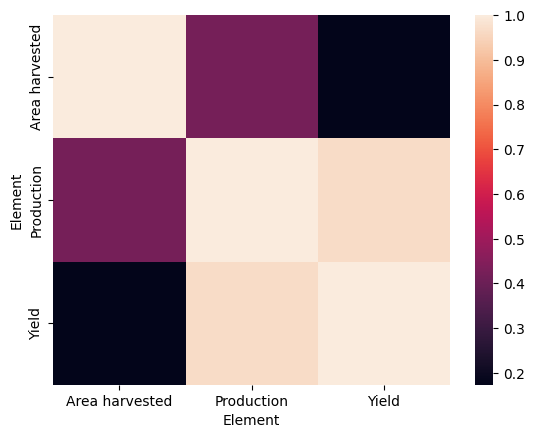

In [26]:
processed_df_extracted=processed_df[processed_df['Year'].between(2000, 2021)]
temp=processed_df_extracted[processed_df_extracted['Item']=='Rice']
temp=temp.drop(columns=['Item', 'Item Code', 'Element Code'])
temp=temp.pivot_table('Value', ['Domain Code', 'Domain', 'Area Code', 'Area', 'Year'], ['Element'])
hm=sbn.heatmap(data=temp.corr())
plt.show();

c:\Users\admind\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\admind\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
c:\Users\admind\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\admind\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


IndexError: index 28 is out of bounds for axis 0 with size 28

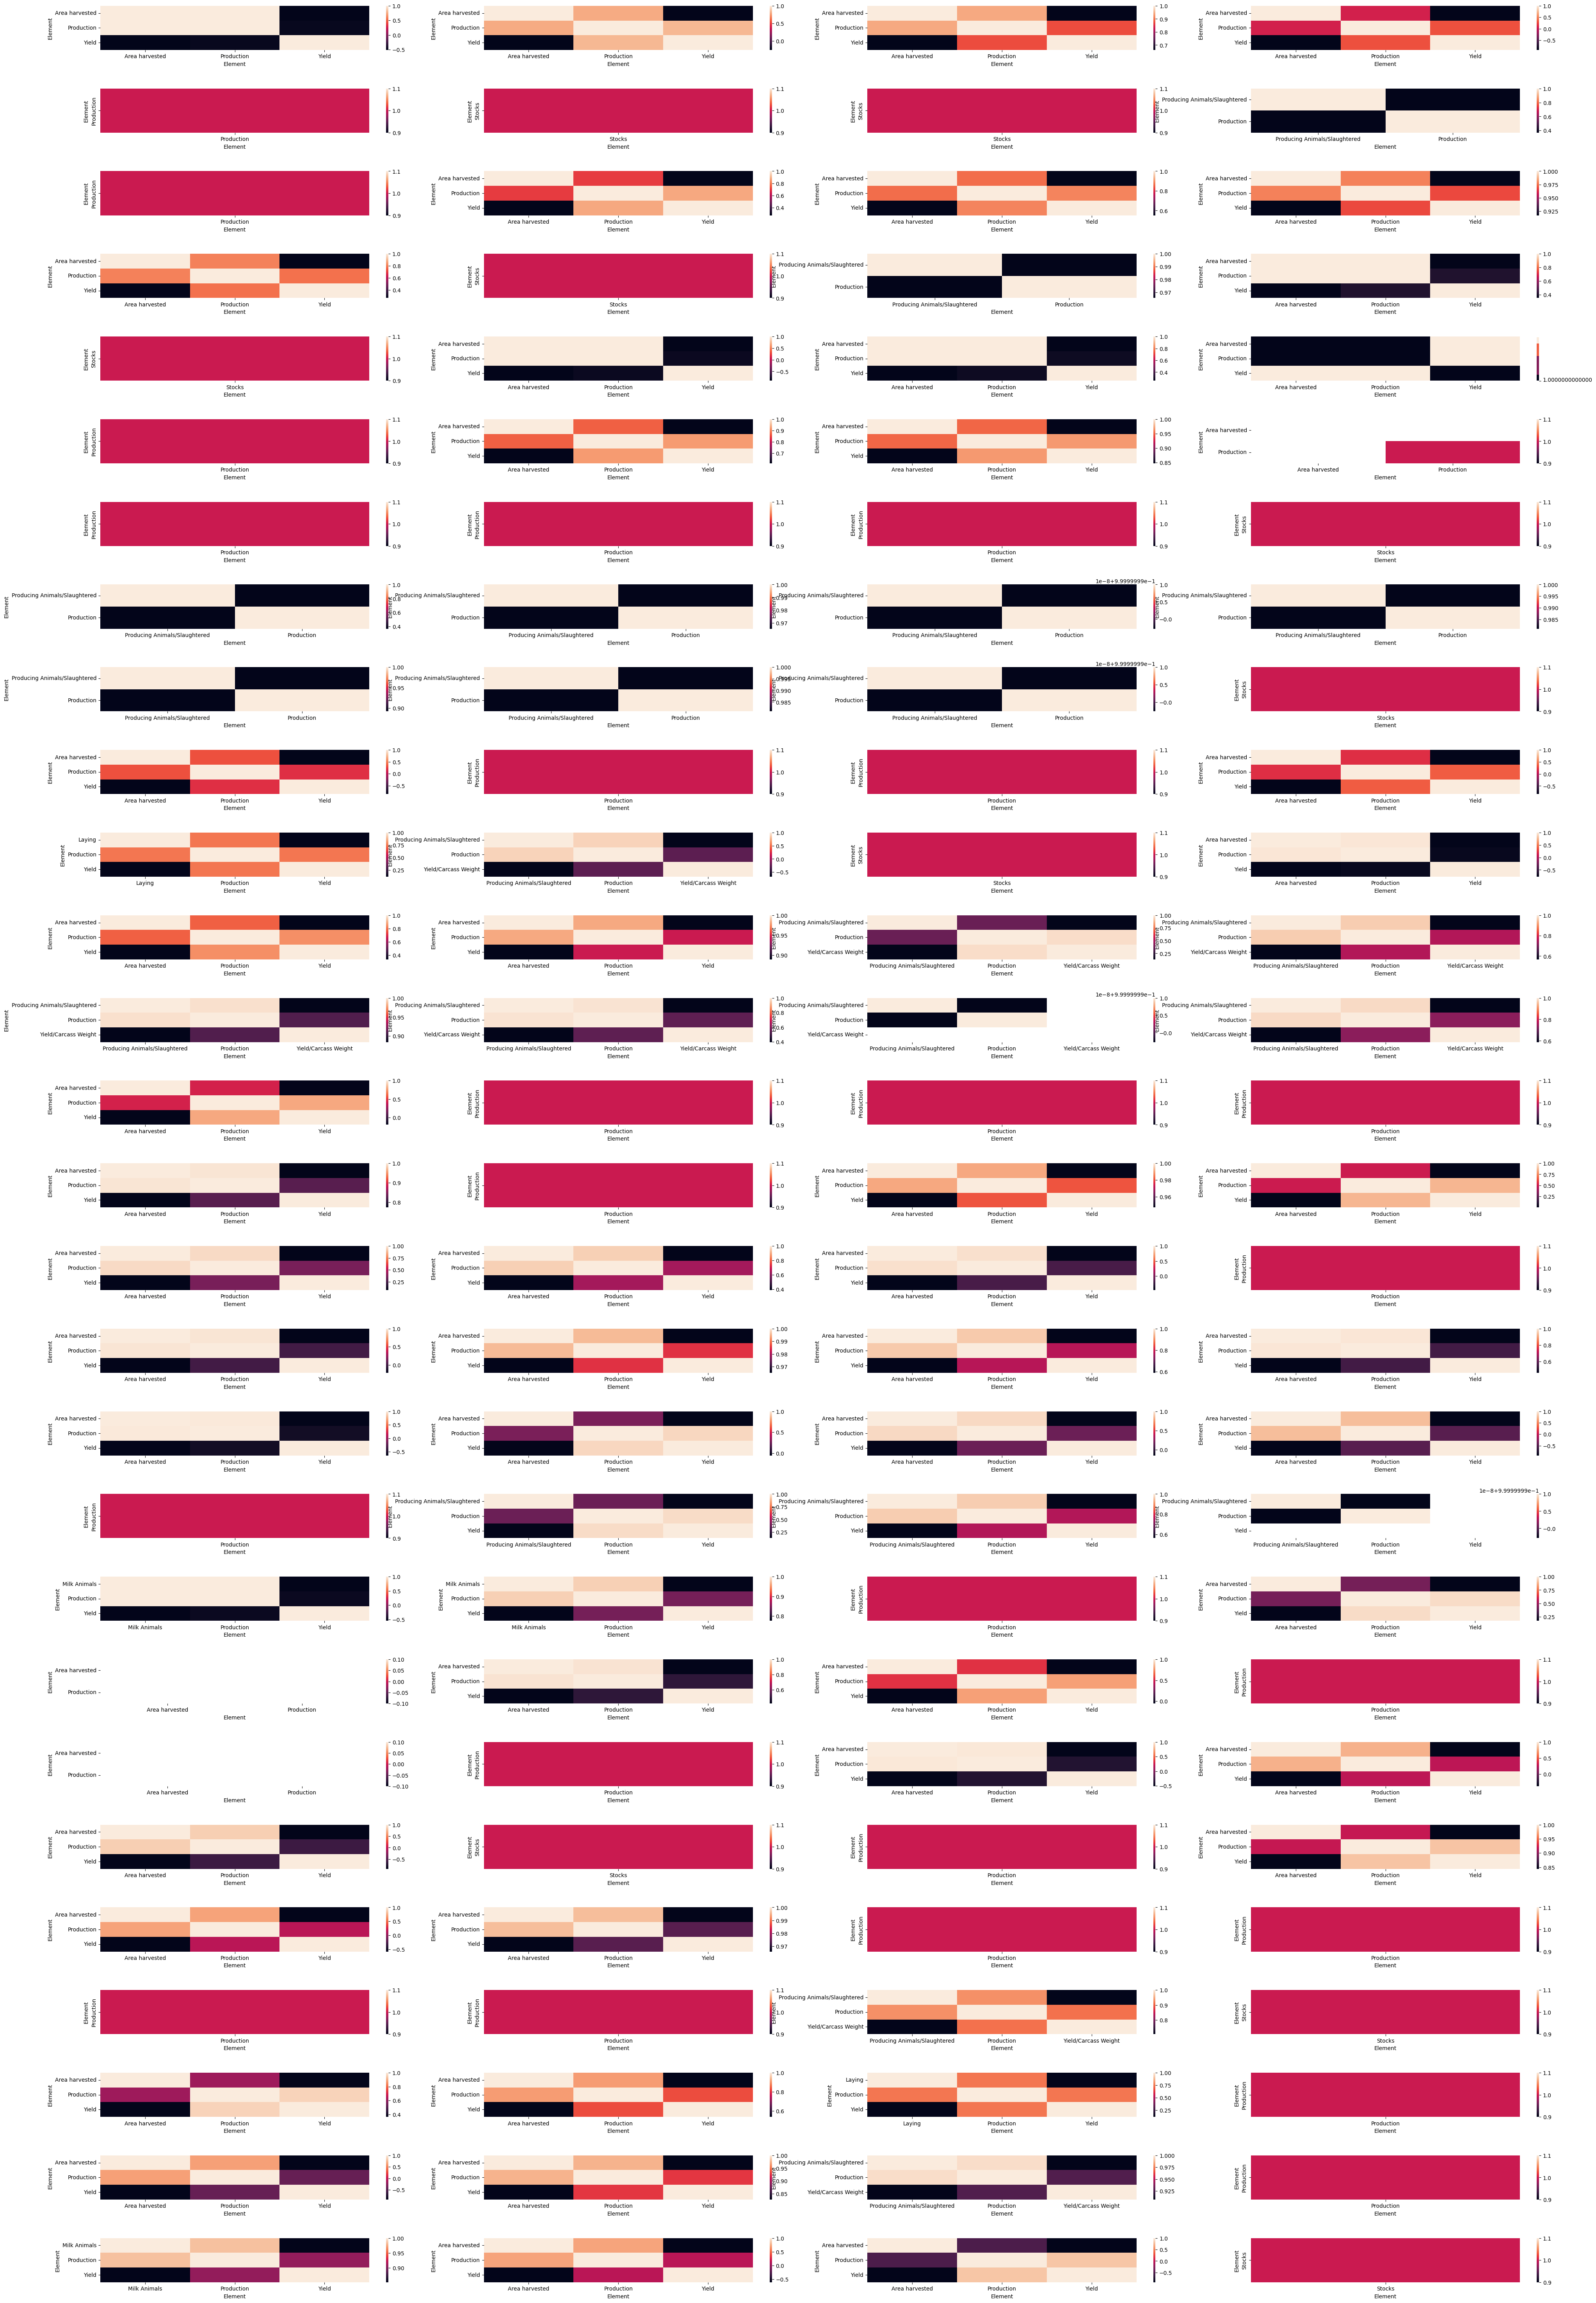

In [29]:
nrows=29
ncols=4

fig, axes=plt.subplots(nrow, ncol, figsize=(40, 60))

i=0 
j=0

fig.tight_layout(pad=5.0)

for item in processed_df_extracted['Item'].unique():
    df=processed_df_extracted[processed_df_extracted['Item']==item]
    df=df.drop(columns=['Item', 'Item Code', 'Element Code'])
    df=df.pivot_table('Value', ['Domain Code', 'Domain', 'Area Code', 'Area', 'Year'], ['Element'])
    hm=sbn.heatmap(data=df.corr(), ax=axes[i][j])
    j=j+1
    if j==ncol:
        j=0
        i=i+1